Student Name: Christian Jones

Student ID: 23294876

# Task 1: Data Preparation Pipeline
Apply same transformations as in etivity1:
- scale mapper applied to education (primary=1, secondary=2, tertiary=3, 0 for anything else)
- one-hot encoding applied to marital, job and poutcome (inc. null)
- populate missing age with mean
- robust scaler applied to balance and duration
- replace age with histogram

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder #needed for data preparation

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [345]:
df = pd.read_csv('bank.csv')
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [346]:
df.drop('day', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('pdays', axis=1, inplace=True)
df.drop('previous', axis=1, inplace=True)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  duration  campaign poutcome subscribed  
1995   cellular       327         2      NaN        yes  
1996   cellular      1334         2      NaN        yes  
1997  telephone       231         1      NaN        yes  
1998        NaN       185         1      NaN        yes  
1999   cellular       208         2      NaN        yes

Identify columns with missing data.

In [347]:
print('default', df['default'].value_counts( dropna = False))
print('housing', df['housing'].value_counts( dropna = False))
print('loan', df['loan'].value_counts( dropna = False))
print('subscribed', df['subscribed'].value_counts( dropna = False))
print('poutcome', df['poutcome'].value_counts( dropna = False))
print('contat', df['contact'].value_counts( dropna = False))

default no     1985
yes      15
Name: default, dtype: int64
housing no     1037
yes     963
Name: housing, dtype: int64
loan no     1750
yes     250
Name: loan, dtype: int64
subscribed no     1000
yes    1000
Name: subscribed, dtype: int64
poutcome failure    955
NaN        454
success    444
other      147
Name: poutcome, dtype: int64
contat cellular     1663
NaN           191
telephone     146
Name: contact, dtype: int64


In [348]:
df['education'].fillna('unknown', inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
df['subscribed'] = df['subscribed'].map({'no': 0, 'yes': 1})

df.tail()

age           job  marital  education  default  balance  housing  loan  \
1995  20.0       student   single    unknown        0     2785        0     0   
1996  28.0        admin.   single  secondary        0      127        0     0   
1997  81.0       retired  married    primary        0     1154        0     0   
1998  46.0      services  married    primary        0     4343        1     0   
1999  40.0  entrepreneur  married  secondary        0     6403        0     0   

        contact  duration  campaign poutcome  subscribed  
1995   cellular       327         2      NaN           1  
1996   cellular      1334         2      NaN           1  
1997  telephone       231         1      NaN           1  
1998        NaN       185         1      NaN           1  
1999   cellular       208         2      NaN           1

In [349]:
preprocess_pipeline = Pipeline(
    steps = [
        ('education_mapper', FunctionTransformer(
            func = lambda X: X.replace({'education': {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}}),
            validate = False
        )),
        ('one_hot_encoder', ColumnTransformer(
            transformers = [
                ('marital', OneHotEncoder(sparse_output=False), ['marital']),
                ('job', OneHotEncoder(sparse_output=False), ['job']),
                ('poutcome', OneHotEncoder(sparse_output=False), ['poutcome']),
                ('contact', OneHotEncoder(sparse_output=False), ['contact'])
            ],
            remainder = 'passthrough'
        )),
        ('robust_scaler', ColumnTransformer(
            transformers = [
                ('balance', RobustScaler(), ['remainder__balance']),
                ('duration', RobustScaler(), ['remainder__duration']),
                ('age', RobustScaler(), ['remainder__duration'])
            ],
            remainder = 'passthrough'
        )),
    ],
    verbose = True
).set_output(transform="pandas")

preprocess_pipeline

/Users/christianjones/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


Pipeline(steps=[('education_mapper',
                 FunctionTransformer(func=<function <lambda> at 0x325e3e5c0>)),
                ('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('marital',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['marital']),
                                                 ('job',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job']),
                                                 ('poutcome',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['poutcome']),
                                                 ('contact',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['contact'])])),
                ('robust_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('balance', RobustScaler(),
                                                  ['remainder__balance']),
                                                 ('duration', RobustScaler(),
                                                  ['remainder__duration']),
                                                 ('age', RobustScaler(),
                                                  ['remainder__duration'])]))],
         verbose=True)

In [350]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [351]:
k = 2

pipe = Pipeline(steps=[
    ('preprocess', preprocess_pipeline), 
    ('kMeans', cluster.KMeans(n_clusters=k, n_init=10, max_iter=300))
])

Fit the pipeline on the dataset to train a clustering model.

In [352]:
clustering_model = pipe.fit(df)

[Pipeline] .. (step 1 of 3) Processing education_mapper, total=   0.0s
[Pipeline] ... (step 2 of 3) Processing one_hot_encoder, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing robust_scaler, total=   0.0s


Review preprocessed data

In [353]:
preprocessed_data = clustering_model['preprocess'].transform(df)
preprocessed_data.describe()

balance__remainder__balance  duration__remainder__duration  \
count                  2000.000000                    2000.000000   
mean                      0.597826                       0.240431   
std                       2.169941                       0.950890   
min                      -1.060984                      -0.982833   
25%                      -0.242204                      -0.386266   
50%                       0.000000                       0.000000   
75%                       0.757796                       0.613734   
max                      55.892585                       6.811159   

       age__remainder__duration  remainder__marital__marital_divorced  \
count               2000.000000                           2000.000000   
mean                   0.240431                              0.107500   
std                    0.950890                              0.309825   
min                   -0.982833                              0.000000   
25%                   -0.386266                              0.000000   
50%                    0.000000                              0.000000   
75%                    0.613734                              0.000000   
max                    6.811159                              1.000000   

       remainder__marital__marital_married  \
count                          2000.000000   
mean                              0.555500   
std                               0.497034   
min                               0.000000   
25%                               0.000000   
50%                               1.000000   
75%                               1.000000   
max                               1.000000   

       remainder__marital__marital_single  remainder__job__job_admin.  \
count                         2000.000000                 2000.000000   
mean                             0.337000                    0.123500   
std                              0.472803                    0.329093   
min                              0.000000                    0.000000   
25%                              0.000000                    0.000000   
50%                              0.000000                    0.000000   
75%                              1.000000                    0.000000   
max                              1.000000                    1.000000   

       remainder__job__job_blue-collar  remainder__job__job_entrepreneur  \
count                      2000.000000                        2000.00000   
mean                          0.149000                           0.02250   
std                           0.356178                           0.14834   
min                           0.000000                           0.00000   
25%                           0.000000                           0.00000   
50%                           0.000000                           0.00000   
75%                           0.000000                           0.00000   
max                           1.000000                           1.00000   

       remainder__job__job_housemaid  ...  \
count                    2000.000000  ...   
mean                        0.017500  ...   
std                         0.131158  ...   
min                         0.000000  ...   
25%                         0.000000  ...   
50%                         0.000000  ...   
75%                         0.000000  ...   
max                         1.000000  ...   

       remainder__contact__contact_cellular  \
count                           2000.000000   
mean                               0.831500   
std                                0.374403   
min                                0.000000   
25%                                1.000000   
50%                                1.000000   
75%                                1.000000   
max                                1.000000   

       remainder__contact__contact_telephone  remainder__contact__contact_nan  \
count                            2000.000000              

# Task 2: k-Means

- Plot the sum of squared distances from the data points in the prepared bank dataset to the centers of the k-Means clusters for various values of k and use the Elbow method to pick the best value of k.
- Use the Silhouette Coefficient method to determine the best value of k as well.
- Use the best value(s) of k to cluster the prepared bank dataset with k-means. Aim at producing meaningful clustering.
- Use MDS and t-SNE for visualising the clusterings. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

Append cluster centers to preprocessed dataset.

In [354]:
data_and_centers = np.r_[preprocessed_data,clustering_model['kMeans'].cluster_centers_]

Project both the data and k-Means cluster centers to 2D using MDS (multi-dimensional scaling), using dimensionality reduction.

In [355]:
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot transformed examples and centers, and assign colours based on clusters.

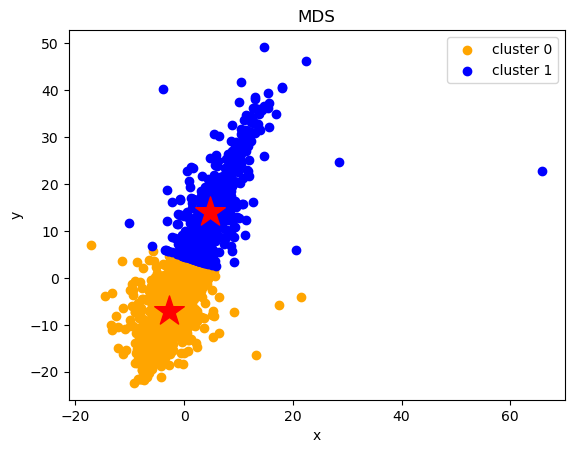

In [356]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustering_model['kMeans'].labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# Task 3: DBSCAN

- Apply DBSCAN clustering algorithm to prepared dataset.
- Use MDS and t-SNE for visualising the clustering. Write a short conclusion about the characteristics of the clusters and compare the performance of DBSCAN to k-Means. (max 250 words in a markdown cell).

In [357]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


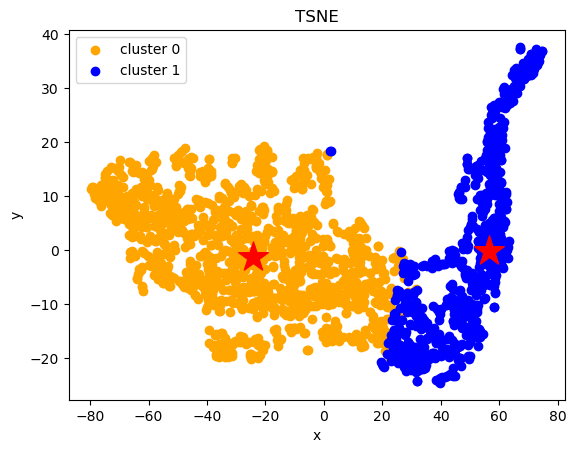

In [358]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustering_model['kMeans'].labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [359]:
df['cluster'] = pd.Series(clustering_model['kMeans'].labels_, index=df.index)

In [360]:
df['cluster'].value_counts(dropna = False)

0    1318
1     682
Name: cluster, dtype: int64

In [361]:
df.groupby('cluster').mean()

/var/folders/yq/4f64vgyn6wj0xvtbnshfphcw0000gn/T/ipykernel_60817/4109590744.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean()


age   default      balance   housing      loan    duration  \
cluster                                                                     
0        34.133563  0.007587  1263.650986  0.518968  0.120637  282.314871   
1        56.478006  0.007331  1703.570381  0.409091  0.133431  310.777126   

         campaign  subscribed  
cluster                        
0        1.918816    0.476480  
1        1.891496    0.545455

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df, kmeans.labels_)
print("Silhouette score: ", score)

## Conclusion

Looking at the clusters, age and balance are consistent between clusters. 
- Cluster 0: most likely to have existing mortgage/loan, and least likely to subscribe
- Cluster 1: least likely to have existing mortgage/loan
- Cluster 2: somewhere in between